In [1]:
import gymnasium as gym 
from GridWorldAgent import GridWorldAgent

In [2]:
import numpy as np
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo
import logging

In [3]:
from GridWorldEnv import GridWorldEnv

gym.register(
    id = "gymnasium_env/GridWord-v0",
    entry_point = GridWorldEnv, 
    )

In [4]:
# hyperparameters
learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1
training_period = 1_000  # record the agent's episode every 250

env = gym.make("gymnasium_env/GridWord-v0", render_mode = "rgb_array")
env = RecordVideo(env, video_folder="gridworld-agent", name_prefix="training",
                  episode_trigger=lambda x: x % training_period == 0)
env = RecordEpisodeStatistics(env, buffer_length=n_episodes)

agent = GridWorldAgent(
    env=env,
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

/Users/ric_carollo/opt/anaconda3/envs/Reinforcement_learning/lib/python3.11/site-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /Users/ric_carollo/Works/RL_examples/GymnasiumTutorial/gridworld-agent folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


In [5]:
from tqdm import tqdm

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

  0%|          | 0/100000 [00:00<?, ?it/s]/Users/ric_carollo/opt/anaconda3/envs/Reinforcement_learning/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: int64
  logger.warn(
/Users/ric_carollo/opt/anaconda3/envs/Reinforcement_learning/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:158: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/Users/ric_carollo/opt/anaconda3/envs/Reinforcement_learning/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:134: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: int64
  logger.warn(
/Users/ric_carollo/opt/anaconda3/envs/Reinforcement_learning/lib/python3.11/site-packages/gymnasium/utils/passive_env

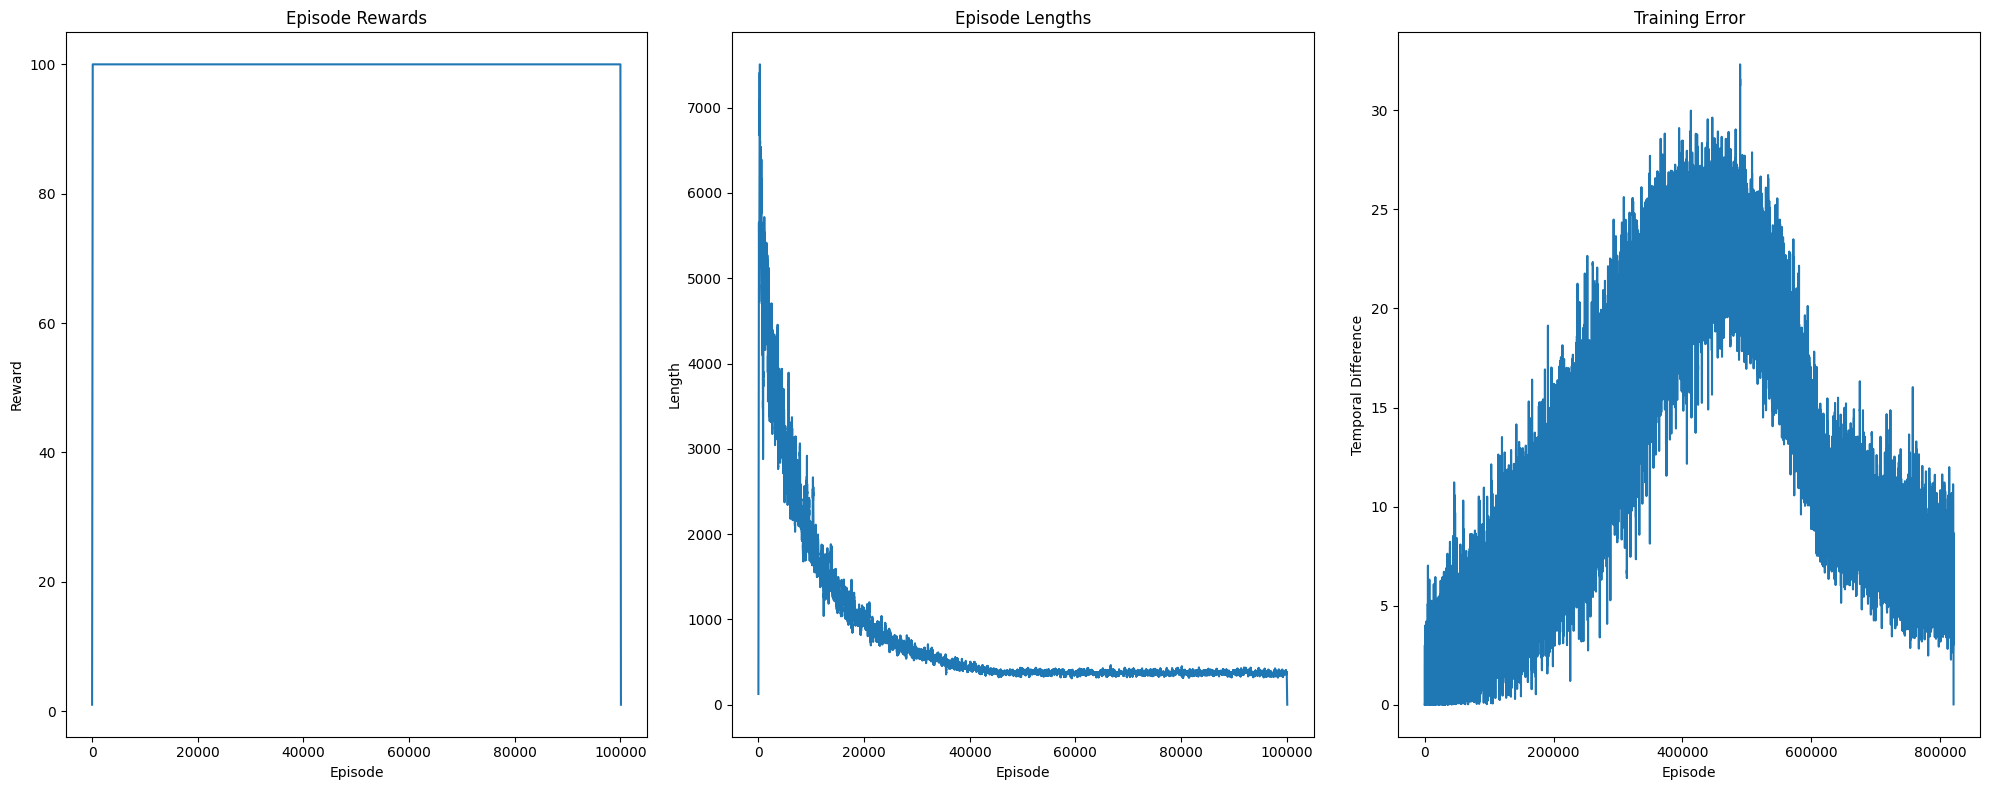

In [6]:
from matplotlib import pyplot as plt
# visualize the episode rewards, episode length and training error in one figure
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# np.convolve will compute the rolling mean for 100 episodes

axs[0].plot(np.convolve(env.return_queue, np.ones(100)))
axs[0].set_title("Episode Rewards")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Reward")

axs[1].plot(np.convolve(env.length_queue, np.ones(100)))
axs[1].set_title("Episode Lengths")
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Length")

axs[2].plot(np.convolve(agent.training_error, np.ones(100)))
axs[2].set_title("Training Error")
axs[2].set_xlabel("Episode")
axs[2].set_ylabel("Temporal Difference")

plt.tight_layout()
plt.show()